# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

**Santiago Hernandez Duque**

Link de mi repositorio: https://github.com/santiagohdq/tecnologiasuibpython.git

In [1]:
import pandas as pd
%pip freeze
df= pd.read_csv("sample_NYC_parking_issues.csv", sep=";")
df.head()

anyio==4.6.2.post1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.9
executing==2.1.0
fastjsonschema==2.20.0
filelock==3.16.1
fonttools==4.55.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.6
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyterlab_widgets==3.0.13
kiwisolver==1.4.7
MarkupSafe==3.0

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS),NaN,NaN,NaN
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,NaN,0.0,2006.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean),NaN,NaN,NaN
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM),NaN,NaN,NaN


### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [ ]:
df.isna().all() #Mostar columnas con valores NaN

Unnamed: 0                           False
Summons Number                       False
Plate ID                             False
Registration State                   False
Plate Type                           False
Issue Date                           False
Violation Code                       False
Vehicle Body Type                    False
Vehicle Make                         False
Issuing Agency                       False
Street Code1                         False
Street Code2                         False
Street Code3                         False
Vehicle Expiration Date              False
Violation Location                   False
Violation Precinct                   False
Issuer Precinct                      False
Issuer Code                          False
Issuer Command                       False
Issuer Squad                         False
Violation Time                       False
Time First Observed                  False
Violation County                     False
Violation I

In [ ]:
df1= df.dropna(axis=1, how="all") #Limpiando el df de columnas con valores NaN
print(df1.head(2)) #Muestra el df limpio (solo las primeras 2 filas)

   Unnamed: 0  Summons Number  Plate ID Registration State Plate Type  \
0     7192124      7684215310   24824MD                 NY        COM   
1     1399831      5070680213  9TOPCLAS                 NY        OMT   

   Issue Date  Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
0  04/23/2014              71               VAN         FRIG              T   
1  09/14/2013               7              4DSD        DODGE              V   

   ...  Days Parking In Effect      From Hours In Effect  To Hours In Effect  \
0  ...                     YYYYYYY                   NaN                 NaN   
1  ...                         NaN                   NaN                 NaN   

   Vehicle Color  Unregistered Vehicle?  Vehicle Year  Meter Number  \
0             WH                    NaN        2004.0           NaN   
1             BK                    NaN        2008.0           NaN   

   Feet From Curb Violation Post Code           Violation Description  
0             0

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [ ]:
df1 = df1.dropna(subset=['Vehicle Year']) #Eliminar filas de Vehicle Year con NaN
df1['Vehicle Year'] = df1['Vehicle Year'].astype(int) #Convertir a enteros los valores de Vehicle Year
df1 = df1[(df1['Vehicle Year']>= 1900) & (df1['Vehicle Year']<= 2024)] #Filtrar en rangos de fechas coherentes
print(df1['Vehicle Year'].unique()) #Mostrando los valores únicos de la serie Vehicle Year


[2004 2008 2006 1996 2003 2012 2011 2001 1988 1998 2009 2002 1994 1997
 2007 2010 2013 1995 2005 1999 2014 1987 1985 1989 1993 1992 1990 2015
 1982 1991 1986 1984 1983 1980]


### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [ ]:
print(df1['Vehicle Make'].unique()) #Mostrando los valores únicos de la serie Vehicle Make para tener idea de qué valores no tienen sentido

['FRIG' 'DODGE' 'HONDA' 'TOYOT' 'VOLKS' 'INTER' 'FORD' 'GMC' 'ME/BE'
 'NISSA' 'CHEVR' 'INFIN' 'LEXUS' 'VOLVO' 'MERCU' 'ACURA' 'NS/OT' 'BMW'
 'PETER' 'LINCO' 'ISUZU' 'FRUEH' 'CHRYS' 'CADIL' 'WORK' 'SUBAR' 'HYUND'
 'SAAB' 'PREV' 'PONTI' 'MITSU' 'ROVER' 'JEEP' 'MAZDA' 'LEXCO' 'WORKH'
 'PORSC' 'FREI' 'AUDI' 'MACK' 'HINO' 'KIA' 'KENWO' 'BENTL' 'UTIL' 'JAGUA'
 'SOLEC' nan 'MI/F' 'MINI' 'BUICK' 'SATUR' 'NAVIS' 'STARC' 'OLDSM' 'VAN H'
 'SMITH' 'UD' 'PRATT' 'FR/LI' 'CHEET' 'SMART' 'UTITY' 'PREVO' 'PLYMO'
 'SUZUK' 'HUMME' 'W' 'KAWAS' 'FIAT' 'FR/L' 'FR L' 'FRGHT' 'ICENE' 'UTILI'
 'WO/C' 'THD' 'VESPA' 'GEM' 'WHITE' 'CHECK' 'RNG R' 'WANC' 'VOLU' 'LIMO'
 'BL/B' 'KENW' 'KRYS' 'MCI' 'KW' 'SZI' 'STAR' 'UPS' 'HERCU' 'GIDNY' 'SPRI'
 'VL' 'WOR' 'AMC' 'PUTEL' 'FRG']


In [ ]:
df1 = df1.dropna(subset=['Vehicle Make']) #Eliminando valores NaN de la serie Vehicle Make
df1 = df1[~df1['Vehicle Make'].str.isnumeric()] #Eliminando valores que contengan números de la serie Vehicle Make (lo cual no tiene sentido)
df1 = df1[df1['Vehicle Make'].str.len()> 2] #Eliminando valores que tengan menos de 3 caracteres

print(df1['Vehicle Make'].unique()) #Mostrando nuevamente la serie Vehicle Make 'limpia'
pd.value_counts(df1['Vehicle Make'].unique()) #Contando cuántas marcas de vehiculos hay ahora

['FRIG' 'DODGE' 'HONDA' 'TOYOT' 'VOLKS' 'INTER' 'FORD' 'GMC' 'ME/BE'
 'NISSA' 'CHEVR' 'INFIN' 'LEXUS' 'VOLVO' 'MERCU' 'ACURA' 'NS/OT' 'BMW'
 'PETER' 'LINCO' 'ISUZU' 'FRUEH' 'CHRYS' 'CADIL' 'WORK' 'SUBAR' 'HYUND'
 'SAAB' 'PREV' 'PONTI' 'MITSU' 'ROVER' 'JEEP' 'MAZDA' 'LEXCO' 'WORKH'
 'PORSC' 'FREI' 'AUDI' 'MACK' 'HINO' 'KIA' 'KENWO' 'BENTL' 'UTIL' 'JAGUA'
 'SOLEC' 'MI/F' 'MINI' 'BUICK' 'SATUR' 'NAVIS' 'STARC' 'OLDSM' 'VAN H'
 'SMITH' 'PRATT' 'FR/LI' 'CHEET' 'SMART' 'UTITY' 'PREVO' 'PLYMO' 'SUZUK'
 'HUMME' 'KAWAS' 'FIAT' 'FR/L' 'FR L' 'FRGHT' 'ICENE' 'UTILI' 'WO/C' 'THD'
 'VESPA' 'GEM' 'WHITE' 'CHECK' 'RNG R' 'WANC' 'VOLU' 'LIMO' 'BL/B' 'KENW'
 'KRYS' 'MCI' 'SZI' 'STAR' 'UPS' 'HERCU' 'GIDNY' 'SPRI' 'WOR' 'AMC'
 'PUTEL' 'FRG']


C:\Users\Santiago Hernandez\AppData\Local\Temp\ipykernel_4528\672268362.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df1['Vehicle Make'].unique())


FRIG     1
DODGE    1
HONDA    1
TOYOT    1
VOLKS    1
        ..
SPRI     1
WOR      1
AMC      1
PUTEL    1
FRG      1
Name: count, Length: 96, dtype: int64

### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#Cargando librerías para graficar

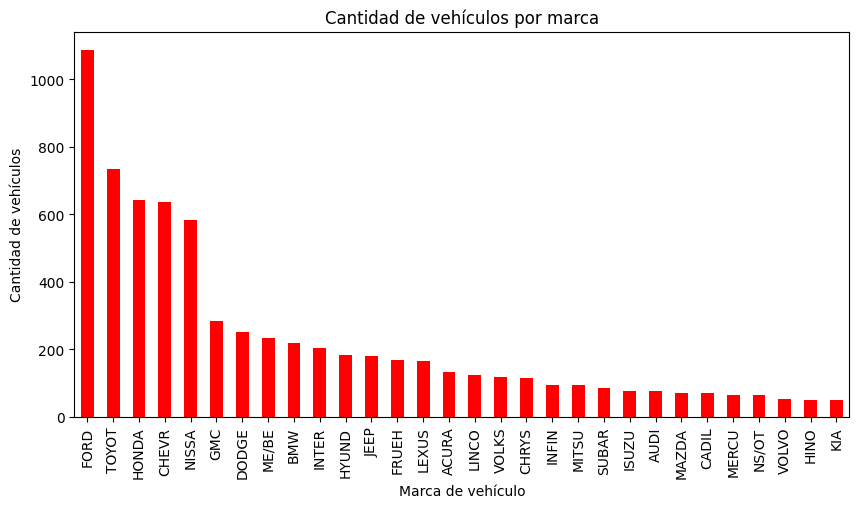

In [ ]:
count_vehic= df1['Vehicle Make'].value_counts() #Contar la cantidad de marcas de vehiculos existentes en la serie
top_count_vehic= count_vehic.head(30) #Para no saturar el gráfico mostaré solo las 30 marcas más comunes

plt.figure(figsize=(10, 5))
top_count_vehic.plot(kind='bar', color='red') #Creando gráfico de barras
plt.title('Cantidad de vehículos por marca')
plt.xlabel('Marca de vehículo')
plt.ylabel('Cantidad de vehículos')

plt.show() #Mostrando el gráfico


### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [25]:
print(df1['Vehicle Color'].unique()) #Identificando valores únicos en la serie Vehicle Color

['WH' 'BK' nan 'GY' 'MR' 'RD' 'BR' 'TAN' 'BL' 'WHITE' 'BROWN' 'BLUE'
 'BLACK' 'TN' 'GREEN' 'OTHER' 'YW' 'BLK' 'DKB' 'GREY' 'GOLD' 'GR' 'BRN'
 'PR' 'LTP' 'RED' 'GRN' 'DKGY' 'WT' 'SILVE' 'SILV' 'DKG' 'GRAY' 'WHT' 'GL'
 'GREN' 'WTH' 'WH-BL' 'YELLO' 'SIL' 'ORANG' 'GRY' 'GYT' 'OR' 'SL' 'LTGY'
 'YL' 'BEIGE' 'LTBL' 'BN' 'LTG' 'LT/' 'W' 'NOCL' 'GN' 'WHR' 'GYW' 'BLU'
 'GY/' 'WHI' 'NOC' 'B' 'BG' 'R' 'GRG' 'SILVR' 'YEL' 'BKJ' 'GYGY' 'VAN'
 'DK/' 'WH/' 'DKR' 'BLK/B' 'PURPL' 'UNKNO' 'YELOW' 'BROW' 'BLGY' 'TNGR'
 'BK-RD' 'DKBL' 'TOPAZ' 'MC' 'RB' 'GY-GY' 'BRW' 'WGUTE' 'RD/' 'WHIT' 'BLG'
 'LTB' 'BUS' 'GYTN' 'GRT' 'GYBR' 'PUR' 'BKBR']


In [29]:
df1 = df1.dropna(subset=['Vehicle Color']) #Eliminando valores NaN de la serie Vehicle Color
agrupar_colores= {
    'WH':'WHITE', 'WITH':'WHITE', 'WHT':'WHITE', 'WT':'WHITE', 'WHI':'WHITE',
    'BK':'BLACK', 'BLK':'BLACK', 'B':'BLACK', 'BRN':'BROWN',
    'R':'RED', 'RD/':'RED', 'RD':'RED', 'YEL':'YELLOW', 'YELLO':'YELLOW',
    'GY':'GREY', 'GY-GY':'GREY', 'GR':'GREEN', 'GRN':'GREEN'
}
df1['Vehicle Color'] = df1['Vehicle Color'].replace(agrupar_colores)

print(df1['Vehicle Color'].unique())

['WHITE' 'BLACK' 'GREY' 'MR' 'RED' 'BR' 'TAN' 'BL' 'BROWN' 'BLUE' 'TN'
 'GREEN' 'OTHER' 'YW' 'DKB' 'GOLD' 'PR' 'LTP' 'DKGY' 'SILVE' 'SILV' 'DKG'
 'GRAY' 'GL' 'GREN' 'WTH' 'WH-BL' 'YELLOW' 'SIL' 'ORANG' 'GRY' 'GYT' 'OR'
 'SL' 'LTGY' 'YL' 'BEIGE' 'LTBL' 'BN' 'LTG' 'LT/' 'W' 'NOCL' 'GN' 'WHR'
 'GYW' 'BLU' 'GY/' 'NOC' 'BG' 'GRG' 'SILVR' 'BKJ' 'GYGY' 'VAN' 'DK/' 'WH/'
 'DKR' 'BLK/B' 'PURPL' 'UNKNO' 'YELOW' 'BROW' 'BLGY' 'TNGR' 'BK-RD' 'DKBL'
 'TOPAZ' 'MC' 'RB' 'BRW' 'WGUTE' 'WHIT' 'BLG' 'LTB' 'BUS' 'GYTN' 'GRT'
 'GYBR' 'PUR' 'BKBR']


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

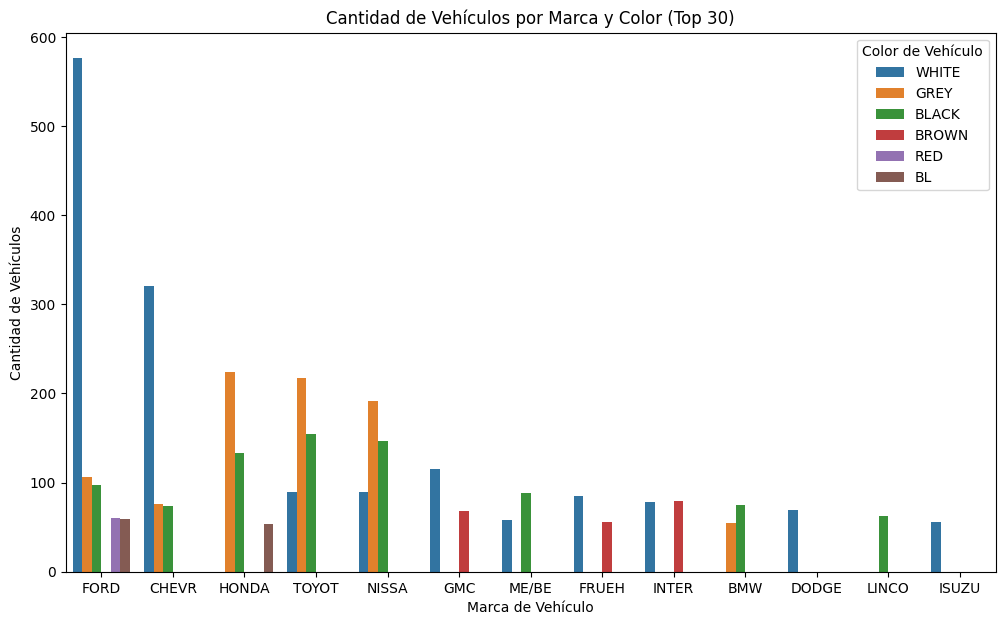

In [41]:
count_vehic = df1.groupby(['Vehicle Make', 'Vehicle Color']).size().reset_index(name='Count') #Contar la cantidad de marcas de colores existentes en la serie
top_color_vehic = count_vehic.nlargest(30, 'Count') #Para no saturar el gráfico mostaré solo los 30 colores más comunes

plt.figure(figsize=(12, 7))
sns.barplot(data=top_color_vehic, x='Vehicle Make', y='Count', hue='Vehicle Color') #Creando el gráfico con la librería Seaborn
plt.title('Cantidad de Vehículos por Marca y Color (Top 30)')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Cantidad de Vehículos')
plt.legend(title='Color de Vehículo')

plt.show()

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

In [ ]:
#Hecho

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [ ]:
df1['Issue Date'] = pd.to_datetime(df1['Issue Date']) #Convirtiendo la serie en temporal
df1 = df1.dropna(subset=['Issue Date']) #Eliminando valores NaN
df1['Month'] = df1['Issue Date'].dt.month
violation_count = df1.groupby(['Violation Code', 'Month']).size().reset_index(name='Count') #Contabilizando las multas

print(violation_count.head()) #Mostrando el conteo de multas

   Violation Code  Month  Count
0               5      1     17
1               5      2     15
2               5      3     26
3               5      6      1
4               5      7      8


### J) Visualiza la anterior cuestión (I)

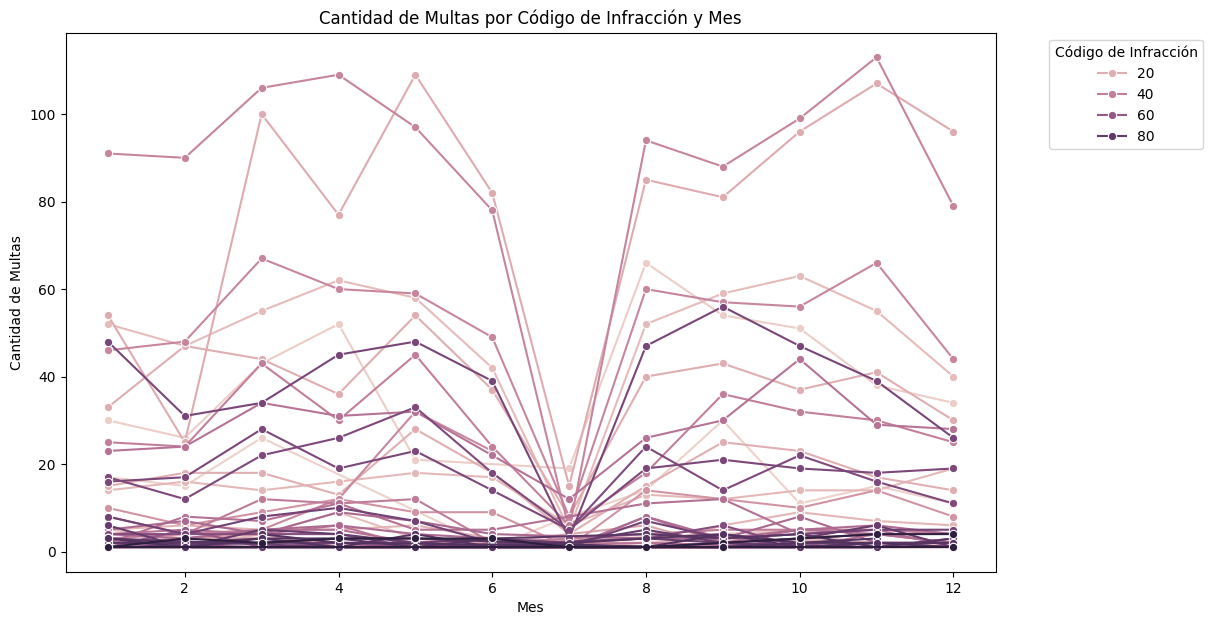

In [46]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=violation_count, x='Month', y='Count', hue='Violation Code', marker='o')
plt.title('Cantidad de Multas por Código de Infracción y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Multas')
plt.legend(title='Código de Infracción', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'

In [47]:
#Hecho